In [1]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import plot_tools
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from numpy.random import RandomState

In [2]:
faces = fetch_olivetti_faces().data
n_samples, n_features = faces.shape
faces_centered = faces - faces.mean(axis=0)

In [3]:
faces_centered.shape

(400, 4096)

In [4]:
# data = fetch_olivetti_faces()
# targets = faces.target
# data = faces.images.reshape((len(data.images), -1))

# #test_idx = [1,  10, 29, 34, 87,  94, 78, 320]
# test_idx = [1, 87, 94, 78]
# train_idx = np.array(list(set(list(range(data.shape[0]))) - set(test_idx) ) )

# train_set = data[train_idx ]
# y_train = targets[train_idx] 
# test_set = data[np.array(test_idx)]
# y_test = targets[ np.array(test_idx)]
# testImage = test_set[0, :]
# print(data.shape, train_set.shape,test_set.shape, testImage.shape)

In [5]:
#cov = np.cov(faces_centered, rowvar=False)
cov  = np.matmul(faces_centered.T, faces_centered)/n_samples

In [6]:
# centered_cov = np.matmul(faces_centered.T, faces_centered)/399
# print(np.allclose(centered_cov, centered_cov))

In [7]:
#

In [8]:
eigvals, principal_directions = np.linalg.eigh(cov)

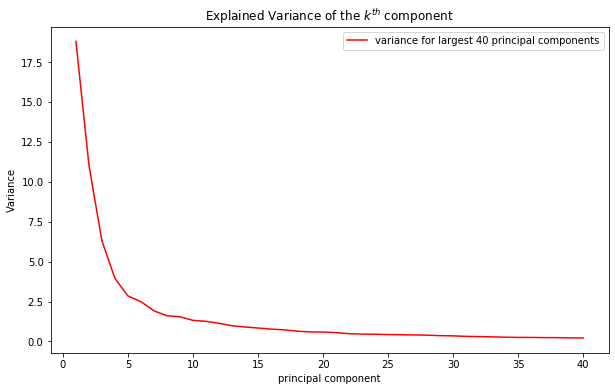

In [9]:
k = 40
truncated_eigvals = eigvals[::-1][:k]
fig, ax = plt.subplots(figsize=(10, 6))
k_range = range(1, k+1)
label_str = "variance for largest {} principal components".format(k)
ax.plot(k_range, truncated_eigvals, "-", color="red", label=label_str)
ax.set_xlabel("principal component")
ax.set_ylabel("Variance")
ax.set_title(r"Explained Variance of the $k^{th}$ component")
ax.legend()
plt.show();
fig.savefig("pb_4_b.pdf",bbox_inches='tight');

In [10]:
model = PCA(n_components=faces.shape[0], svd_solver="full")
model.fit(faces)
sigmas = model.singular_values_[:k]
sigmas 
# k = 40
# fig, ax = plt.subplots(figsize=(10, 6))
# k_range = range(1, k+1)
# ax.plot(k_range, sigmas, "-", color="red", label="variance for largest {} principal components".format(k))
# ax.set_xlabel("principal component")
# ax.set_ylabel("Variance")
# ax.set_title(r"Explained Variance of the $k^{th}$ component")
# ax.legend()
# plt.show();

array([86.70196  , 66.465294 , 50.15516  , 39.722527 , 33.757362 ,
       31.568716 , 27.678606 , 25.35455  , 24.862417 , 22.97515  ,
       22.440626 , 21.298521 , 19.83868  , 19.029678 , 18.317497 ,
       17.56838  , 17.033207 , 16.045593 , 15.426735 , 15.356079 ,
       14.8501835, 13.92934  , 13.5770035, 13.410839 , 13.130965 ,
       12.9575   , 12.735862 , 12.511105 , 12.0198145, 11.801412 ,
       11.265184 , 11.012787 , 10.6893   , 10.276612 , 10.056747 ,
        9.988402 ,  9.814746 ,  9.709448 ,  9.4375105,  9.3004675],
      dtype=float32)

In [11]:
(sigmas ** 2) / (400 - 1) * 1/eigvals[::-1][:40]

array([1.0025061, 1.0025067, 1.0025058, 1.0025064, 1.0025051, 1.0025039,
       1.0025063, 1.0025074, 1.0025063, 1.0025065, 1.0025067, 1.0025059,
       1.0025078, 1.0025072, 1.0025073, 1.0025066, 1.0025066, 1.002506 ,
       1.002507 , 1.0025067, 1.0025069, 1.0025061, 1.0025065, 1.0025059,
       1.0025069, 1.002507 , 1.0025067, 1.0025061, 1.0025064, 1.0025064,
       1.0025064, 1.0025061, 1.0025065, 1.0025065, 1.0025064, 1.0025065,
       1.002506 , 1.0025064, 1.0025064, 1.0025064], dtype=float32)

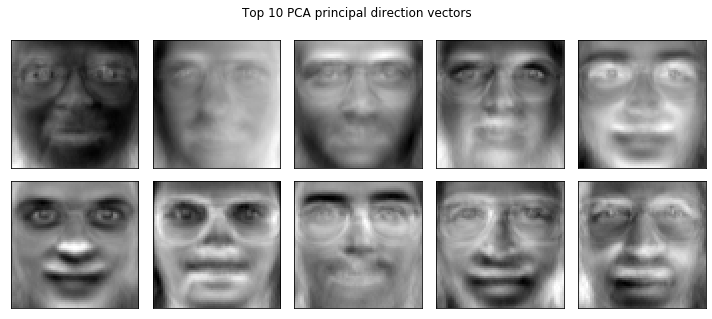

In [12]:
k =10
title = "Top {} PCA principal direction vectors".format(k)
plot_tools.plot_image_grid(model.components_[:k], title)

In [13]:
model.components_[:3]

array([[-0.00419107, -0.00710951, -0.0093361 , ...,  0.0001852 ,
         0.0033797 ,  0.0031883 ],
       [-0.02859127, -0.03328845, -0.03784652, ...,  0.02962781,
         0.02721298,  0.02488896],
       [ 0.00135701, -0.00032572, -0.00019797, ..., -0.01541374,
        -0.01370987, -0.01188349]], dtype=float32)

In [14]:
model.components_[:10]

array([[-0.00419107, -0.00710951, -0.0093361 , ...,  0.0001852 ,
         0.0033797 ,  0.0031883 ],
       [-0.02859127, -0.03328845, -0.03784652, ...,  0.02962781,
         0.02721298,  0.02488896],
       [ 0.00135701, -0.00032572, -0.00019797, ..., -0.01541374,
        -0.01370987, -0.01188349],
       ...,
       [-0.00678748, -0.00337458,  0.0028092 , ...,  0.00401484,
         0.00404916,  0.00015647],
       [-0.02528693, -0.03559724, -0.03818332, ...,  0.02710645,
         0.02857053,  0.0266846 ],
       [ 0.01962189,  0.0221866 ,  0.02114378, ..., -0.02401929,
        -0.0200316 , -0.02253301]], dtype=float32)

In [15]:
top_pd = principal_directions[:, ::-1][:,:10].T
top_pd

array([[-0.0041911 , -0.0071095 , -0.00933609, ...,  0.00018516,
         0.00337966,  0.00318826],
       [-0.02859139, -0.03328836, -0.0378465 , ...,  0.02962783,
         0.02721299,  0.02488899],
       [ 0.00135691, -0.0003258 , -0.00019799, ..., -0.01541365,
        -0.01370978, -0.01188341],
       ...,
       [ 0.00678746,  0.00337441, -0.0028093 , ..., -0.00401472,
        -0.00404904, -0.00015637],
       [-0.02528691, -0.03559711, -0.0381833 , ...,  0.0271064 ,
         0.02857047,  0.02668457],
       [ 0.01962219,  0.02218682,  0.02114398, ..., -0.0240193 ,
        -0.02003155, -0.02253291]], dtype=float32)

In [16]:
print(np.allclose(model.components_[:10], top_pd))

False


# Principal direction vectors

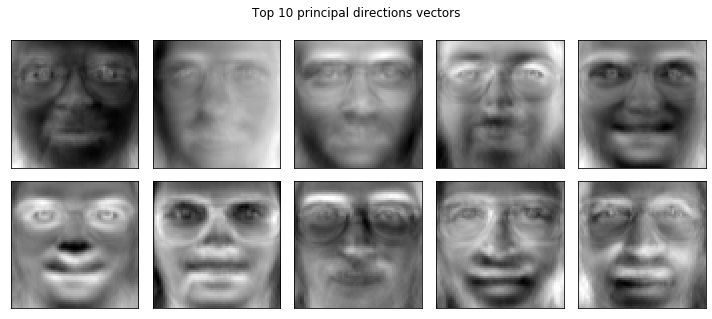

In [17]:
faces = fetch_olivetti_faces().data
n_samples, n_features = faces.shape
faces_centered = faces - faces.mean(axis=0)
cov  = np.matmul(faces_centered.T, faces_centered)/n_samples
_, principal_directions = np.linalg.eigh(cov)
k = 10
top_pd = principal_directions[:, ::-1][:,:k].T
title = "Top {} principal directions vectors".format(k)
plot_tools.plot_image_grid(top_pd, title)

# PC Nearest Neighbors

(396, 40)
(4, 40)


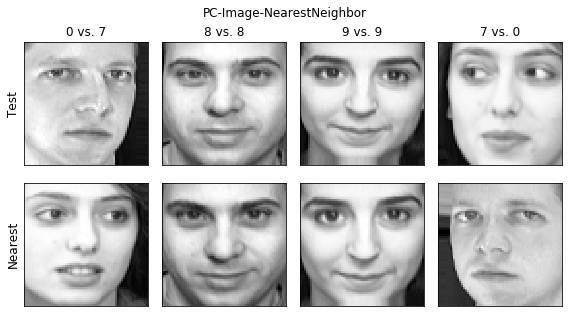

In [33]:
def compute_nearest_neighbors(train_matrix, testImage):
    distances = np.sqrt(np.sum((train_matrix - testImage) ** 2, axis=1))
    idx_of_closest_point_in_train_matrix = np.argsort(distances)
    return idx_of_closest_point_in_train_matrix[0]

test_idx = [1, 87, 94, 78]

faces = fetch_olivetti_faces()
targets = faces.target
faces = faces.images.reshape((len(faces.images), -1))

train_idx = np.array(list(set(list(range(faces.shape[0]))) - set(test_idx)))
train_set = faces[train_idx]
y_train = targets[train_idx]
test_set = faces[np.array(test_idx)]
y_test = targets[np.array(test_idx)]

k = 40
model = PCA(n_components=k)
model.fit(faces);
principal_components = model.transform(faces)

top_principal_components = model.components_
projected_train_set = train_set.dot(top_principal_components.T)
print(projected_train_set.shape)
projected_test_set = test_set.dot(top_principal_components.T)
print(projected_test_set.shape)


imgs = list()
est_labels = list()
for i in range(projected_test_set.shape[0]):
    test_image = projected_test_set[i, :]
    nnIdx = compute_nearest_neighbors(projected_train_set, test_image)
    imgs.extend([test_set[i,:], train_set[nnIdx, :]])
    est_labels.append(y_train[nnIdx])

row_titles = ['Test', 'Nearest']
col_titles = ['%d vs. %d' % (i, j) for i, j in zip(y_test, est_labels)]
plot_tools.plot_image_grid(imgs,
                               "PC-Image-NearestNeighbor",
                               (64, 64), len(projected_test_set), 
                           n_row=2, bycol=True, row_titles=row_titles, col_titles=col_titles)


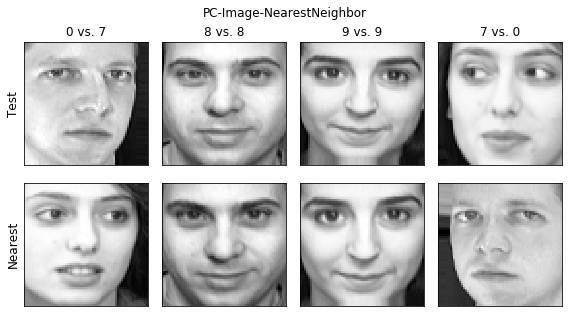

In [36]:
test_idx = [1, 87, 94, 78]

bunch  = fetch_olivetti_faces()
faces = bunch.data
n_samples, n_features = faces.shape
faces_centered = faces - faces.mean(axis=0)
targets = bunch.target

face_images = bunch.images.reshape((len(bunch.images), -1))
train_idx = np.array(list(set(list(range(face_images.shape[0]))) - set(test_idx)))

train_set = face_images[train_idx]
y_train = targets[train_idx]
test_set = face_images[np.array(test_idx)]
y_test = targets[np.array(test_idx)]


k = 100
cov  = np.matmul(faces_centered.T, faces_centered)/n_samples
_, principal_directions = np.linalg.eigh(cov)
top_pd = principal_directions[:, ::-1][:,:k].T

#train_idx = np.array(list(set(list(range(n_samples))) - set(test_idx)))
projected_train_set = train_set.dot(top_pd.T)
projected_test_set = test_set.dot(top_pd.T)

imgs = list()
est_labels = list()
for i in range(projected_test_set.shape[0]):
    test_image = projected_test_set[i, :]
    nnIdx = compute_nearest_neighbors(projected_train_set, test_image)
    imgs.extend([test_set[i,:], train_set[nnIdx, :]])
    est_labels.append(y_train[nnIdx])

row_titles = ['Test', 'Nearest']
col_titles = ['%d vs. %d' % (i, j) for i, j in zip(y_test, est_labels)]
plot_tools.plot_image_grid(imgs,
                               "PC-Image-NearestNeighbor",
                               (64, 64), len(projected_test_set), 
                           n_row=2, bycol=True, row_titles=row_titles, col_titles=col_titles)

# KMeans

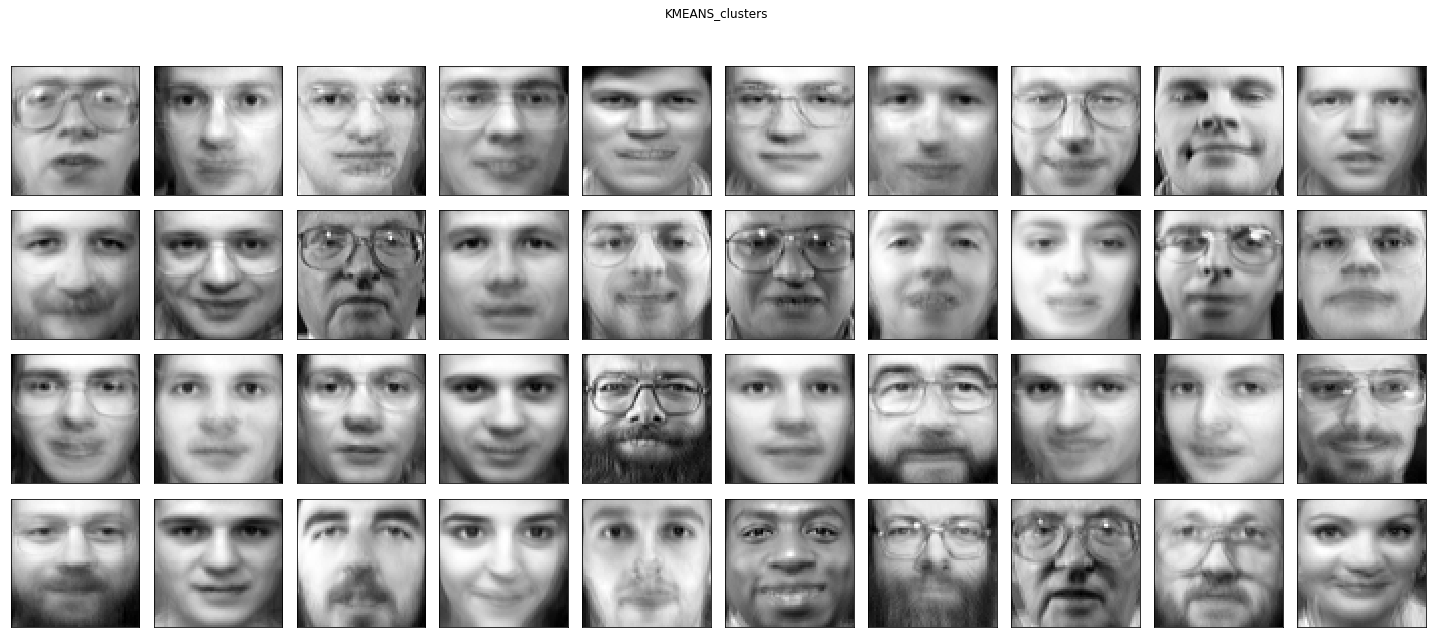

In [38]:
rng = RandomState(0)
center = True
n_components = 40

faces = fetch_olivetti_faces().data
estimator =  KMeans(n_clusters=n_components, random_state=rng)
estimator.fit(faces)
kmeans_components = estimator.cluster_centers_
plot_tools.plot_image_grid(kmeans_components, "KMEANS_clusters", (64, 64), 10, n_row=4, bycol=True)